<img width=200px align="top" src="https://www.fct.unl.pt/sites/default/files/images/nova_4.png" title="Source: [Online] https://www.fct.unl.pt/sites/default/files/images/nova_4.png">

## SI 22/23 - Air Quality Prediction using Machine Learning
### 1) Problem Description

Air pollution is progressively becoming a larger and larger concern in many cities around the globe. Among several air pollutants, Particulate Matters (PM) are considered as one of the most dangerous. Particularly, particles with a diameter of 2.5 μm or less (called PM2.5) can penetrate into human lungs and enter blood vessels, possibly having several nefarious effects such as DNA mutations, cancer, central nervous system damage and premature death.

Existing [biomedical research](https://www.atsjournals.org/doi/abs/10.1165/rcmb.4868) has shown that PM2.5 can hardly be self-cleaned by the human immune system after being inhaled. For this reason it is extremely important to accurately monitor and predict the concentration of PM2.5 and other pollutants in the air. Such predictions would enable safety measures to be taken preemptively (e.g. public announcements, cancelling outdoor activities) in order to mitigate the negative consequences of high concentrations of such pollutants in certain periods of time.

<img width=400px align="right" src="https://live.staticflickr.com/89/274164473_77f36f0696_b.jpg" title="Source: [Online] https://live.staticflickr.com/89/274164473_77f36f0696_b.jpg">
      
---

### 2) Data Characterization:

The dataset contains hourly data regarding the concentration of air pollutants from an air quality control site from the Beijing Municipal Environmental Monitoring Center. This is matched with the meteorological data from the nearest weather station from the China Meteorological Administration. The time period is from the **1st of March 2013** to the **28th of February 2017**. Missing data are denoted as NA. 

There are **4 datetime features** [*year, month, day, hour*], **1 pollutant** [*PM2.5* (ug/m³)] and **5 meteorological features** [*TEMP* (degree Celsius), *PRES* (hPa), *DEWP* (dew point temperature in degree Celsius), *RAIN* (mm), *WSPM* (wind speed m/s)]. 

For the context of this assignment additional columns with lagged features have been created corresponding to the data from the past 3 hours.

---

### 3) Material/Requirements:

* If you don"t have a Python environment already configured in your machine it is recommended that you download and install Python 3.7 via the [Anaconda distribution](https://www.anaconda.com/distribution/).

* **Packages:** *Pandas* and *Numpy* (data structures and manipulation), *Scikit-Learn* and *py-xgboost* (Machine Learning), *Matplotlib* and *Seaborn* (visualization).

* Recommended IDE: VSCode. Alternatively Jupyter Notebook can also be used (comes with the Anaconda distribution).

* Node-Red: will be used for the final part of the assignment. A docker container will be provided, but it can also be installed directly on your machine.

---

### 4) Guidelines and Deadline:

**Goals:**
* Develop machine learning models capable of predicting PM25 concentration 24 hours ahead.
* Integrate a Python script with a rule engine in Node-Red to quickly provide users with a dashboard/alerts and enable an easy integration with other platforms.

**Submission:**
* Completed projects should be submitted via the course"s **Moodle** page before the end of the deadline.
* Projects should be executed in groups of 2 or 3 (maximum) students. Individual projects are allowed, but not encouraged.
* The project should be submitted as a **single .zip/rar** archive named following the template **"*studentNumber1_studentNumber2_studentNumber3.rar*"** (e.g. *31444_31445_31446.rar*). Further details will be given on the Moodle page.
* Deadline is **22 of December 2022, 23:59 GMT**.

---

### 5) Evaluation Criteria

All of the goal/value pairs listed below are based on the assumption that a correct implementation is submitted. 

Feel free to fill in the *Completed* column in accordance to your submission for the discussion (replace "*-*" with "*X*" when suitable).

| Goal                                                     | Value | Completed |
|:--------------------------------------------------------|:------|:----------:| 
| 💾 1) Loading and preparing train/test data                | 2     |     ✔      |
| 🏋️ 2) Training **at least 3** different regressors         | 6     |     ✔      |
| 💯 3) Evaluating each regressor using adequate metrics     | 4     |     ✔      |
| 📈 4) Plotting the results for comparison                  | 3     |     ✔      |
| 💬 5) Integration with rule engine in Node-Red           | 2     |     -      |
| ❓  6) Implementation of **at least 2** "free choice" features           | 3     |    -       |

---

### 6) List of Free Choice Features:
**Python:**
* Feature Engineering on the original dataset (e.g., create new features);
* Hyperparameter tuning to improve model performance (please refer to the [documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection));

**Node-Red:**
* Implementation of more complex rules (e.g., if predicted value is increasing, trigger a different alarm);
* Creation of a dashboard for alerts/data visualization using *node-red-dashboard* (https://flows.nodered.org/node/node-red-dashboard);

---

### 7) Lab Planning

* Lab 1 - Setup, Data Ingestion and Model Training
* Lab 2 - Finalize Model Training, Evaluation and Visualization
* Lab 3 - Integration with Node-Red and Free-Choice Features

---

### Handling Imports

In [1]:
import datetime
import time

print("running")
start_time = time.time()

running


In [2]:
import pandas as pd
import numpy as np
import math
 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, model_selection, preprocessing

# import the sklearn modules for the models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor


plt.style.use('seaborn-bright')

/tmp/ipykernel_7987/3586119673.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


## Data Ingestion and Pre-processing

Suggested reference material: ["10 Minutes to Pandas"](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) from the Pandas [documentation](https://pandas.pydata.org/pandas-docs/stable/).

### Loading the Dataset

In [3]:
# ****************************************** TODO **********************************************
# load the training data 
# - Use read_csv (pandas) to load data into a dataframe with the datetime as index
# - Use the dataframe's head() to check the first few rows 
# ***********************************************************************************************

import pandas as pd

df = pd.read_csv('/workspaces/Supervisao-Inteligente/Labwork3/data/dataset_SI_2223.csv')
df['datetime'] = pd.to_datetime(df['datetime'], format="%d/%m/%Y %H:%M")
df.head()

,datetime,year,month,day,hour,PM2.5_3,TEMP_3,PRES_3,DEWP_3,RAIN_3,...,PRES_1,DEWP_1,RAIN_1,WSPM_1,TEMP,PRES,DEWP,RAIN,WSPM,PM2.5
0,2013-01-03 00:00:00,2013,3,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.7,1023.0,-18.8,0.0,4.4,4.0
1,2013-01-03 01:00:00,2013,3,1,1,NaN,NaN,NaN,NaN,NaN,...,1023.0,-18.8,0.0,4.4,-1.1,1023.2,-18.2,0.0,4.7,8.0
2,2013-01-03 02:00:00,2013,3,1,2,NaN,NaN,NaN,NaN,NaN,...,1023.2,-18.2,0.0,4.7,-1.1,1023.5,-18.2,0.0,5.6,7.0
3,2013-01-03 03:00:00,2013,3,1,3,4.0,-0.7,1023.0,-18.8,0.0,...,1023.5,-18.2,0.0,5.6,-1.4,1024.5,-19.4,0.0,3.1,6.0
4,2013-01-03 04:00:00,2013,3,1,4,8.0,-1.1,1023.2,-18.2,0.0,...,1024.5,-19.4,0.0,3.1,-2.0,1025.2,-19.5,0.0,2.0,3.0


### Creating target columns

In [4]:
# ****************************************** TODO **********************************************
# Create the target column corresponding to the pollutant concentration 24h after present values
# by shifting the current value columns by 24.
# Check the .shift function from Pandas' Dataframe.
# ***********************************************************************************************
df['PM_25_target24'] = df['PM2.5'].shift(-24)
df.head()

,datetime,year,month,day,hour,PM2.5_3,TEMP_3,PRES_3,DEWP_3,RAIN_3,...,DEWP_1,RAIN_1,WSPM_1,TEMP,PRES,DEWP,RAIN,WSPM,PM2.5,PM_25_target24
0,2013-01-03 00:00:00,2013,3,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.7,1023.0,-18.8,0.0,4.4,4.0,22.0
1,2013-01-03 01:00:00,2013,3,1,1,NaN,NaN,NaN,NaN,NaN,...,-18.8,0.0,4.4,-1.1,1023.2,-18.2,0.0,4.7,8.0,14.0
2,2013-01-03 02:00:00,2013,3,1,2,NaN,NaN,NaN,NaN,NaN,...,-18.2,0.0,4.7,-1.1,1023.5,-18.2,0.0,5.6,7.0,13.0
3,2013-01-03 03:00:00,2013,3,1,3,4.0,-0.7,1023.0,-18.8,0.0,...,-18.2,0.0,5.6,-1.4,1024.5,-19.4,0.0,3.1,6.0,3.0
4,2013-01-03 04:00:00,2013,3,1,4,8.0,-1.1,1023.2,-18.2,0.0,...,-19.4,0.0,3.1,-2.0,1025.2,-19.5,0.0,2.0,3.0,3.0


### Handling missing values

In [5]:
# ****************************************** TODO **********************************************
# Check the shape and sum of missing values per feature using the .shape and .isna().sum() 
# functions from Pandas' Dataframe.
# ***********************************************************************************************
df.shape

(35064, 30)

In [6]:
# ****************************************** TODO **********************************************
# Drop rows containing missing values using .dropna . Verify if rows were correctly dropped by
# printing the dataframe's shape.
# ***********************************************************************************************
df.dropna(inplace=True)
df.head()

,datetime,year,month,day,hour,PM2.5_3,TEMP_3,PRES_3,DEWP_3,RAIN_3,...,DEWP_1,RAIN_1,WSPM_1,TEMP,PRES,DEWP,RAIN,WSPM,PM2.5,PM_25_target24
3,2013-01-03 03:00:00,2013,3,1,3,4.0,-0.7,1023.0,-18.8,0.0,...,-18.2,0.0,5.6,-1.4,1024.5,-19.4,0.0,3.1,6.0,3.0
4,2013-01-03 04:00:00,2013,3,1,4,8.0,-1.1,1023.2,-18.2,0.0,...,-19.4,0.0,3.1,-2.0,1025.2,-19.5,0.0,2.0,3.0,3.0
5,2013-01-03 05:00:00,2013,3,1,5,7.0,-1.1,1023.5,-18.2,0.0,...,-19.5,0.0,2.0,-2.2,1025.6,-19.6,0.0,3.7,5.0,9.0
6,2013-01-03 06:00:00,2013,3,1,6,6.0,-1.4,1024.5,-19.4,0.0,...,-19.6,0.0,3.7,-2.6,1026.5,-19.1,0.0,2.5,3.0,4.0
7,2013-01-03 07:00:00,2013,3,1,7,3.0,-2.0,1025.2,-19.5,0.0,...,-19.1,0.0,2.5,-1.6,1027.4,-19.1,0.0,3.8,3.0,3.0


## Simple Exploratory Data Analysis (EDA)

Suggested reference material: Seaborn [documentation](https://seaborn.pydata.org/api.html), particularly [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap) and the [example](https://seaborn.pydata.org/examples/many_pairwise_correlations.html).

/tmp/ipykernel_7987/1782655690.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=bool))
/tmp/ipykernel_7987/1782655690.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), mask=mask, xticklabels=True, yticklabels=True)


<AxesSubplot: >

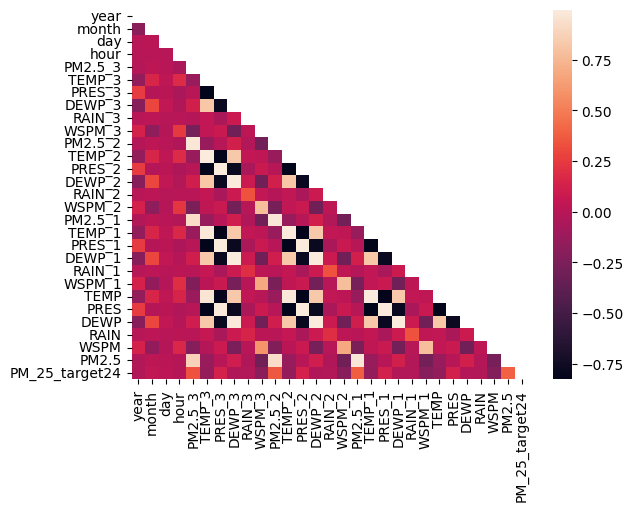

In [7]:
# ****************************************** TODO **********************************************
# Plot the correlation matrix for the dataset.
# ***********************************************************************************************
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, xticklabels=True, yticklabels=True)

In [8]:
# ****************************************** TODO **********************************************
# Generate descriptive statistics that summarize the dataset using .describe from Pandas' Dataframe.
# ***********************************************************************************************
df.describe()

,year,month,day,hour,PM2.5_3,TEMP_3,PRES_3,DEWP_3,RAIN_3,WSPM_3,...,DEWP_1,RAIN_1,WSPM_1,TEMP,PRES,DEWP,RAIN,WSPM,PM2.5,PM_25_target24
count,32991.000000,32991.000000,32991.000000,32991.000000,32991.000000,32991.000000,32991.000000,32991.000000,32991.000000,32991.000000,...,32991.000000,32991.000000,32991.000000,32991.000000,32991.000000,32991.000000,32991.000000,32991.000000,32991.000000,32991.000000
mean,2014.645964,6.493892,15.603680,11.438180,82.867427,13.663595,1011.713008,3.336704,0.069837,1.692422,...,3.338723,0.069179,1.690070,13.646327,1011.725605,3.339035,0.069073,1.690009,82.970025,82.899285
std,1.187191,3.428888,8.788939,6.956492,81.825110,11.381800,10.350159,13.603692,0.934160,1.193608,...,13.603849,0.926590,1.190724,11.381883,10.348743,13.604084,0.926478,1.189075,81.824496,81.818847
min,2013.000000,1.000000,1.000000,0.000000,3.000000,-16.800000,985.900000,-35.300000,0.000000,0.000000,...,-35.300000,0.000000,0.000000,-16.800000,985.900000,-35.300000,0.000000,0.000000,3.000000,3.000000
25%,2014.000000,4.000000,8.000000,5.000000,22.000000,3.300000,1003.200000,-7.800000,0.000000,0.900000,...,-7.800000,0.000000,0.900000,3.300000,1003.200000,-7.800000,0.000000,0.900000,22.000000,22.000000
50%,2015.000000,7.000000,16.000000,11.000000,59.000000,14.700000,1011.100000,4.000000,0.000000,1.400000,...,4.000000,0.000000,1.400000,14.600000,1011.200000,4.100000,0.000000,1.400000,59.000000,59.000000
75%,2016.000000,9.000000,23.000000,18.000000,114.000000,23.300000,1020.000000,15.800000,0.000000,2.200000,...,15.800000,0.000000,2.200000,23.300000,1020.000000,15.800000,0.000000,2.200000,115.000000,115.000000
max,2017.000000,12.000000,31.000000,23.000000,898.000000,40.500000,1042.000000,28.500000,72.500000,11.200000,...,28.500000,72.500000,11.200000,40.500000,1042.000000,28.500000,72.500000,11.200000,898.000000,898.000000


## Model Training

In this section we will train our regression models to forecast the pollutant concentrations. 

### Helper Functions

Before the training stage, let us define a couple of helper functions to later evaluate our models and visualize the results.

In [9]:
# ****************************************** TODO **********************************************
# Build a dictionary with key/value pairs for each metric and calculate its value using the corresponding
# sklearn.metrics call. Build a pandas dataframe from the dict using pd.DataFrame.from_dict
# ***********************************************************************************************
def evaluate_regressor(name, model, y_test, y_pred):
    
    """Calculate the main regression metrics supporting multi-target cases for a given model.  

    Args:
    name (str): The trained model's name
    model: the trained regressor
    y_test (series): Contains the ground truth values (aka y_true)
    y_pred (series): Contains the predicted values for the test set
        
    Returns:
    df_metrics (DataFrame): The predicted metrics in a DataFrame
        
    """
    
    dict_metrics = {
        'Explained Variance':   metrics.explained_variance_score(y_test, y_pred),
        'MAE':                  metrics.mean_absolute_error(y_test, y_pred),
        'MSE':                  metrics.mean_squared_error(y_test, y_pred),
        'RMSE':                 np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
        'R2':                   metrics.r2_score(y_test, y_pred)
    }

    df_metrics = pd.DataFrame.from_dict(dict_metrics, orient='index')
    df_metrics.columns = [name]
    return df_metrics

For the visualization part, please check the [corresponding section](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) of the documentation as reference.

In [10]:
def plot_forecast(y_pred_single, target_name, title, lower_date=None, upper_date=None):
        
    """Plots the predicted vs actual values for a given interval (if provided) or the entire timespan  

    Args:
        y_pred_single (series): Contains the predicted values for a single target
        target_name (str): id of the target column
        title (str): title for the plot
        lower_date (str): lower limit for the timespan in the format 'MM-DD-YY' (e.g. '03-01-2017')
        upper_date (str): upper limit for the timespan in the format 'MM-DD-YY' (e.g. '03-01-2017')
        
    Returns:
            
    """
    df_test = df.loc[y_test.index, :]
    df_test['Predicted'] = y_pred_single

    fig, ax = plt.subplots()
    fig.set_figwidth(15)
    fig.set_figheight(5)

    df_test = df_test.set_index(pd.to_datetime(df_test['datetime'], format="%d/%m/%Y %H:%M"))     
    df_test['datetime'] = df_test.index

    _ = df_test[[target_name,'Predicted']].plot(kind='line',ax=ax)
    plt.gcf().autofmt_xdate()

    ax.set_xbound(lower=lower_date, upper=upper_date)
    ax.set_ylim(bottom=0)

    plot = plt.suptitle(title)

    return df_test

### Train/Test Split

In [11]:
# ****************************************** TODO **********************************************
# Split the dataset into X and Y (suggestion: use .iloc)
# Then use train_test_split from skikit-learn to further split them into X_train, X_test, y_train,
# and y_test with and appropriate test size (e.g. 20% or 33%)
# ***********************************************************************************************
#X = df.iloc[:, :-1]
#y = df.iloc[:, :-1]
X = df[["datetime","year","month","day","hour","PM2.5_3","TEMP_3","PRES_3","DEWP_3","RAIN_3","WSPM_3","PM2.5_2","TEMP_2","PRES_2","DEWP_2","RAIN_2","WSPM_2","PM2.5_1","TEMP_1","PRES_1","DEWP_1","RAIN_1","WSPM_1","TEMP","PRES","DEWP","RAIN","WSPM","PM2.5"]]
y = df['PM_25_target24']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling
Suggested reference material: [Pre-processing](https://scikit-learn.org/stable/modules/preprocessing.html) documentation from Scikit-Learn.


In [12]:
# ****************************************** TODO **********************************************
# Create an instance of a scaler and fit it to the training data using .fit . Afterwards,
# scale both X_train and X_test using .transform .
# ***********************************************************************************************

#X_train['datetime'] = pd.to_datetime(X_train['datetime'])
#X_test['datetime'] = pd.to_datetime(X_test['datetime'])
X_train.drop(['datetime'], axis=1, inplace=True)
X_test.drop(['datetime'], axis=1, inplace=True)


scalerX_train = preprocessing.StandardScaler().fit(X_train)
scalerX_test = preprocessing.StandardScaler().fit(X_test)

X_train = scalerX_train.transform(X_train)
X_test = scalerX_test.transform(X_test)


## Regression

Suggested reference material: Scikit-Learn's [documentation](https://scikit-learn.org/stable/documentation.html) which includes [tutorials](https://scikit-learn.org/stable/tutorial/index.html). 

Example of possible models:
* DecisionTreeRegressor (Decision Tree)
* RandomForestRegressor (Random Forest)
* ExtraTreesRegressor (Extremely Randomized Trees)
* MLPRegressor (Multilayer Perceptron - Artificial Neural Network)
* KNeighborsRegressor
* AdaBoostRegressor

### Models

In [13]:
# ****************************************** TODO **********************************************
# Train and evaluate at least 3 different models (different algorithms).
# For the evaluation use the evaluate_regressor function implemented
# in the previous step, which should calculate the different metrics for a given model.
# ***********************************************************************************************

# Instantiate a decision tree model
decision_tree_regressor = DecisionTreeRegressor(max_depth=6)
# Fit the decision tree model to the training data
decision_tree_regressor.fit(X_train, y_train)
# Generate predictions for the test set using the decision tree model
decision_tree_predictions = decision_tree_regressor.predict(X_test)

# Instantiate a random forest model
random_forest_regressor = RandomForestRegressor(max_depth=6)
# Fit the random forest model to the training data
random_forest_regressor.fit(X_train, y_train)
# Generate predictions for the test set using the random forest model
random_forest_predictions = random_forest_regressor.predict(X_test)


# Instantiate a MLP model
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100), max_iter=1000)
# Fit the MLPR model to the training data
mlp_regressor.fit(X_train, y_train)
# Generate predictions for the test set using the MLPR model
mlp_predictions = mlp_regressor.predict(X_test)


In [14]:
# Evaluate the decision tree model using the evaluate_regressor function
df_decision_tree_metrics = evaluate_regressor('Decision Tree Regressor', decision_tree_regressor, y_test, decision_tree_predictions)

# Evaluate the random forest model using the evaluate_regressor function
df_random_forest_metrics = evaluate_regressor('Random Forest Regressor', random_forest_regressor, y_test, random_forest_predictions)

# Evaluate the MLP model using the evaluate_regressor function
df_mlp_metrics = evaluate_regressor('MLP Regressor', mlp_regressor, y_test, mlp_predictions)


# Display the evaluation metrics for each model
print(df_decision_tree_metrics)
print(df_random_forest_metrics)
print(df_mlp_metrics)

                    Decision Tree Regressor
Explained Variance                 0.268549
MAE                               50.082872
MSE                             4868.039608
RMSE                              69.771338
R2                                 0.268345
                    Random Forest Regressor
Explained Variance                 0.311286
MAE                               48.984292
MSE                             4583.633785
RMSE                              67.702539
R2                                 0.311091
                    MLP Regressor
Explained Variance       0.786933
MAE                     25.109882
MSE                   1417.637382
RMSE                    37.651526
R2                       0.786932


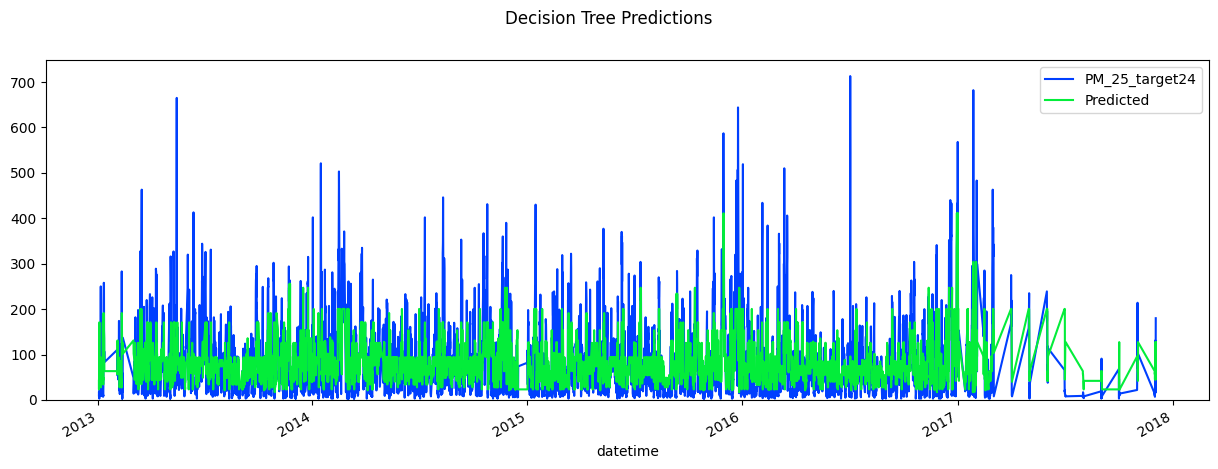

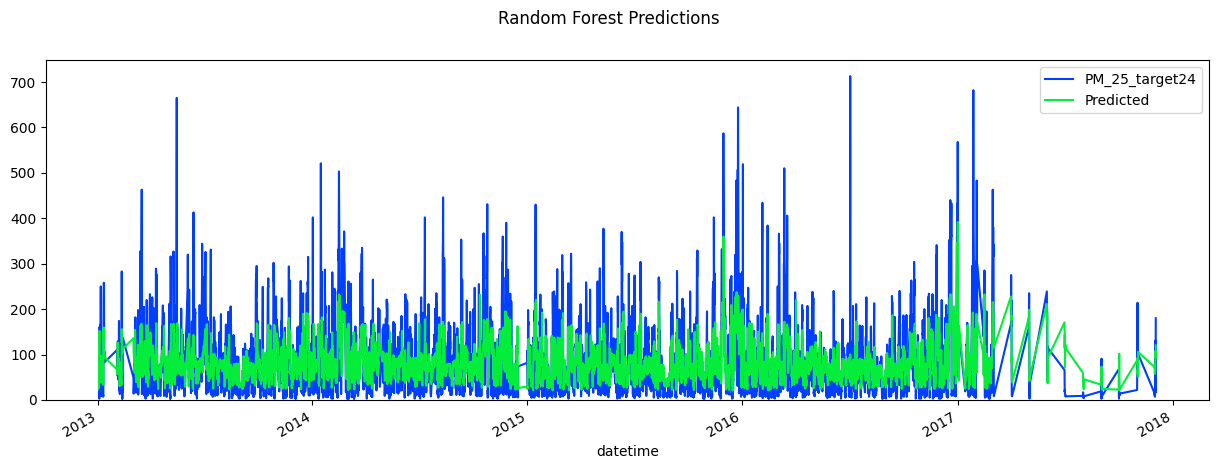

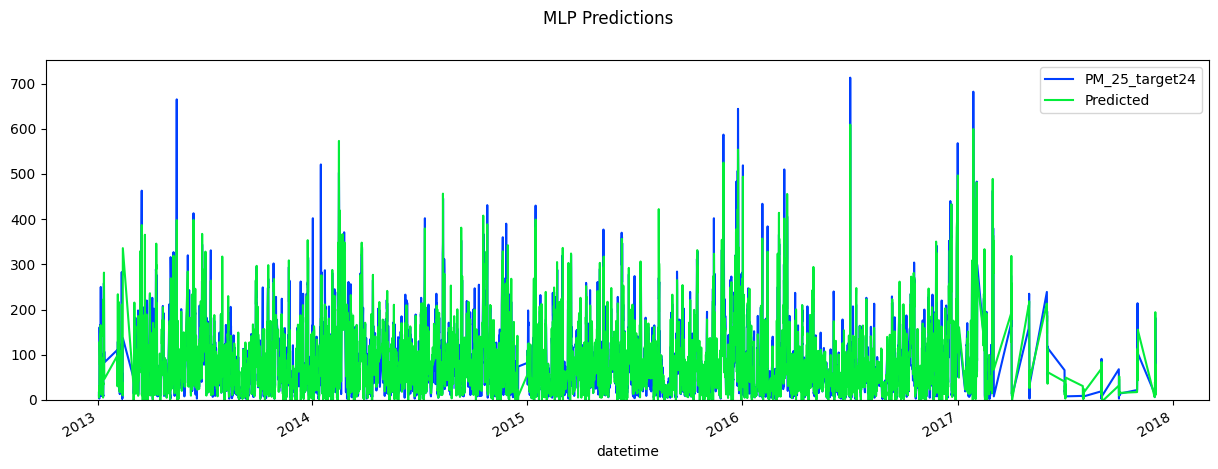

In [15]:
# ****************************************** TODO **********************************************
# Plot test set results for the entire period using the plot_forecast function from the previous
# section for each pollutant type. You can also pass the lower and upper limits to visualize
# specific date ranges.
# ***********************************************************************************************
df_test2 = plot_forecast(decision_tree_predictions, "PM_25_target24", "Decision Tree Predictions")
df_test3 = plot_forecast(random_forest_predictions, "PM_25_target24", "Random Forest Predictions")
df_test4 = plot_forecast(mlp_predictions, "PM_25_target24", "MLP Predictions")

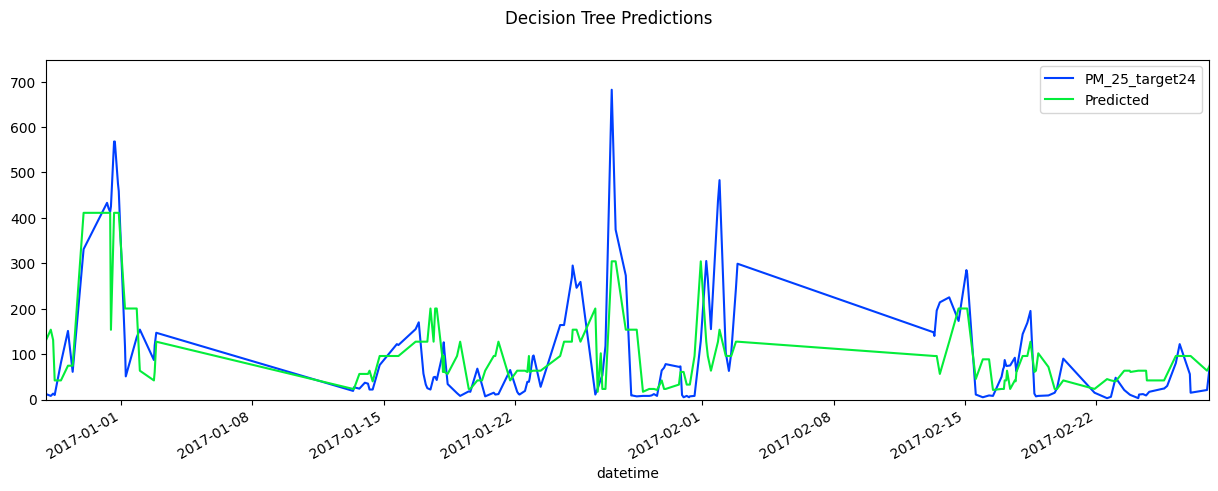

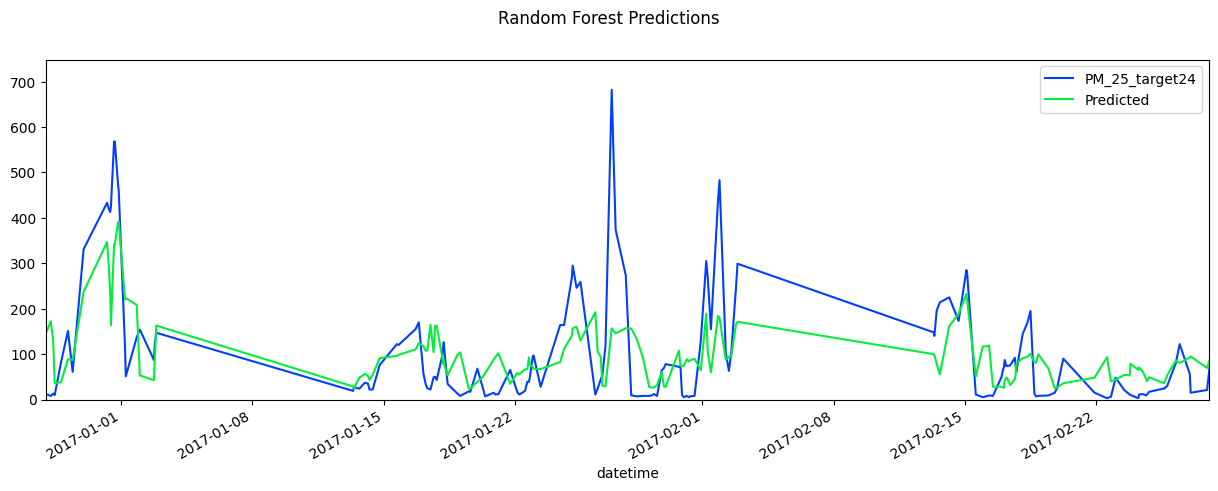

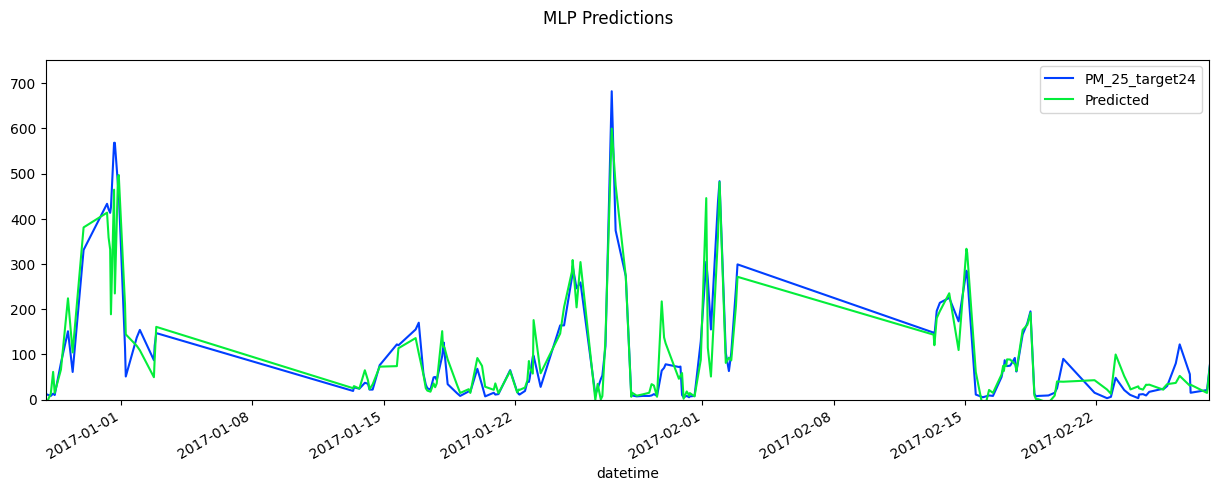

In [16]:
# TODO Plot test set results for the last 2 months of the dataset
df_test2 = plot_forecast(decision_tree_predictions, "PM_25_target24", "Decision Tree Predictions", "2016-12-28", "2017-02-28")
df_test3 = plot_forecast(random_forest_predictions, "PM_25_target24", "Random Forest Predictions", "2016-12-28", "2017-02-28")
df_test4 = plot_forecast(mlp_predictions, "PM_25_target24", "MLP Predictions", "2016-12-28", "2017-02-28")

In [17]:
# print how long it took to run the notebook

print("Notebook execution took %.2f seconds" % (time.time() - start_time))

Notebook execution took 240.12 seconds


### Model Performance Summary

In [18]:
# ****************************************** TODO **********************************************
# Compare all models. Suggestion: use pandas concat to merge the metrics (dataframes) from each model. 
# ***********************************************************************************************
metrics_all = pd.concat([df_decision_tree_metrics, df_random_forest_metrics, df_mlp_metrics], axis=1)
metrics_all

,Decision Tree Regressor,Random Forest Regressor,MLP Regressor
Explained Variance,0.268549,0.311286,0.786933
MAE,50.082872,48.984292,25.109882
MSE,4868.039608,4583.633785,1417.637382
RMSE,69.771338,67.702539,37.651526
R2,0.268345,0.311091,0.786932


## Model Persistence - Saving the Best Model

Refer to the [Model Persistence](https://scikit-learn.org/stable/modules/model_persistence.html) example from the Scikit-Learn documentation using joblib.

In [19]:
# ****************************************** TODO **********************************************
# Save the best model to disk using joblib.dump
# ***********************************************************************************************
from joblib import dump, load

dump(mlp_regressor, 'mlp_model.joblib')

['mlp_model.joblib']